# Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [7]:
df = pd.read_csv('D:/Interships Projects/Oasis/retailsale.csv')

In [8]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100


In [9]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,16-05-2023,CUST996,Male,62,Clothing,1,50,50
996,997,17-11-2023,CUST997,Male,52,Beauty,3,30,90
997,998,29-10-2023,CUST998,Female,23,Beauty,4,25,100
998,999,05-12-2023,CUST999,Female,36,Electronics,3,50,150
999,1000,12-04-2023,CUST1000,Male,47,Electronics,4,30,120


# Describing the Dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [13]:
df.shape

(1000, 9)

### checking the data that is there any null values are there or not

In [15]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

# Visualize the Dataset

In [17]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [20]:
# unique values of the dataset
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

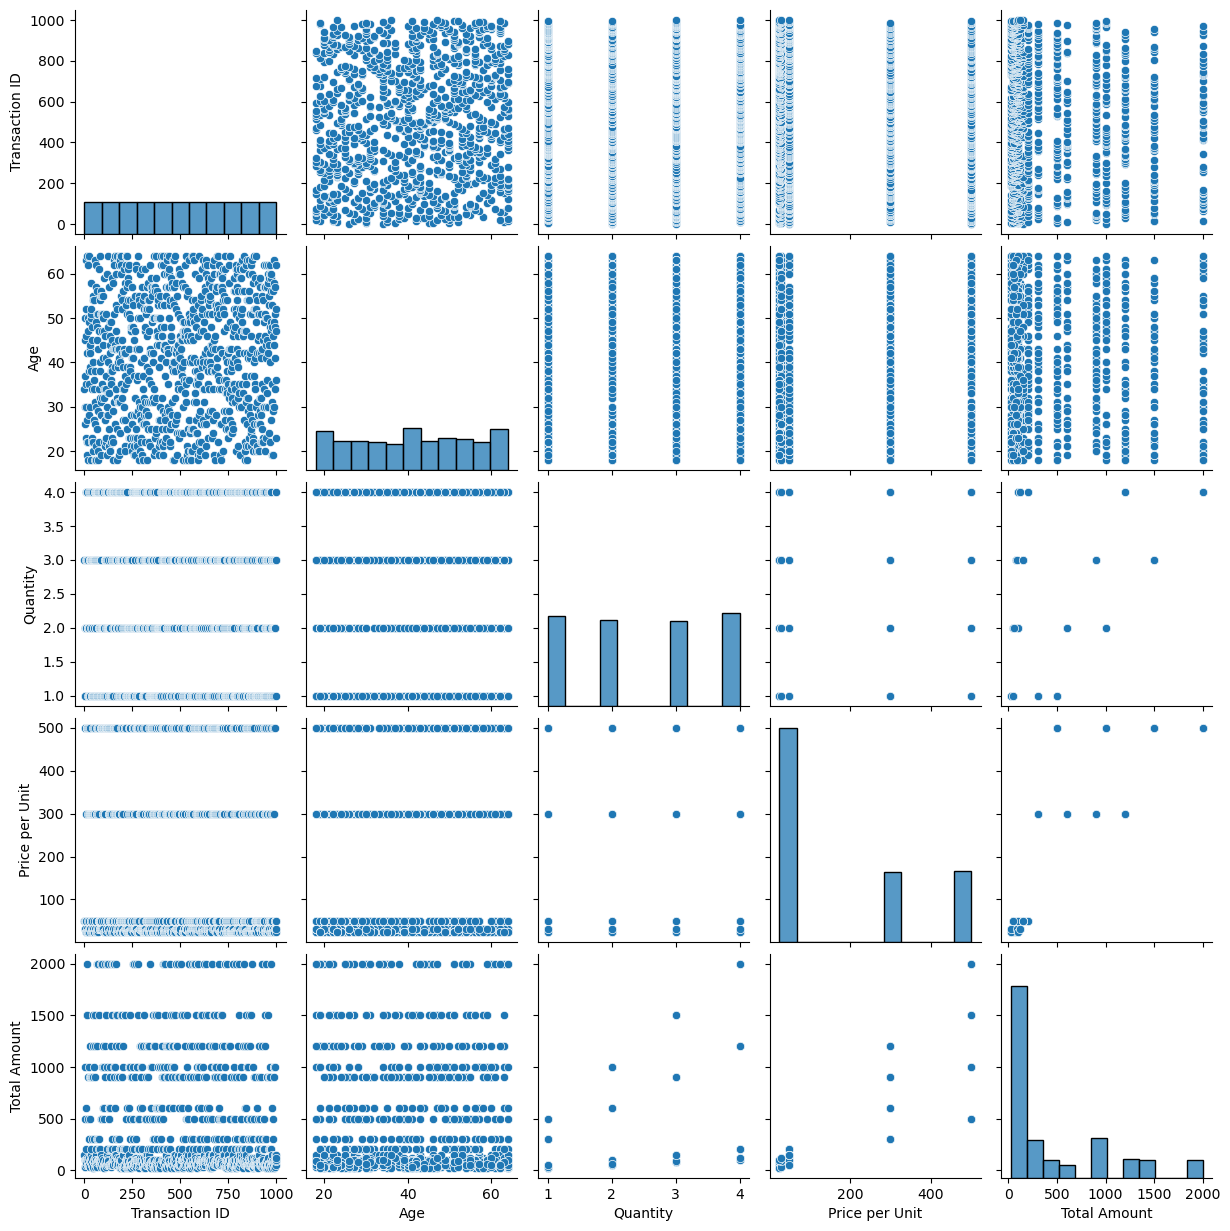

In [26]:
sns.pairplot(df)

#### counting the products i product category

In [29]:
df[df['Product Category'].isin(['Clothing', 'Beauty', 'Electronics'])]['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

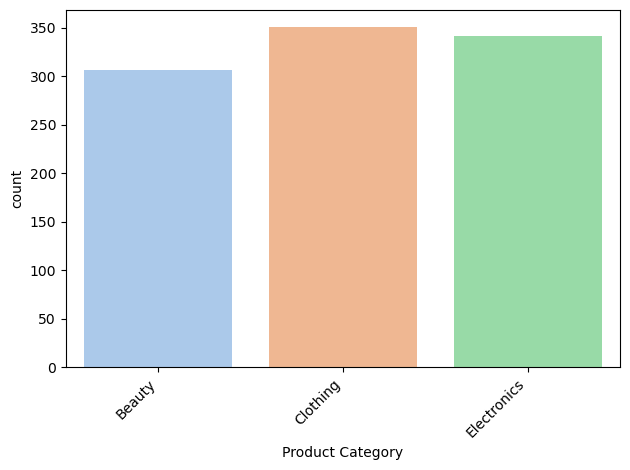

In [39]:
sns.countplot(data=df, x='Product Category', palette='pastel')
plt.xticks(rotation=45, ha='right') # Rotate x labels by 45 degrees and align text to the right
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Group your data by category and summarize it by quantity and total amout

In [11]:
df.groupby('Product Category')[['Quantity','Total Amount']].sum()

,Quantity,Total Amount
Product Category,,
Beauty,771,143515
Clothing,894,155580
Electronics,849,156905


### Comparison using bar graph

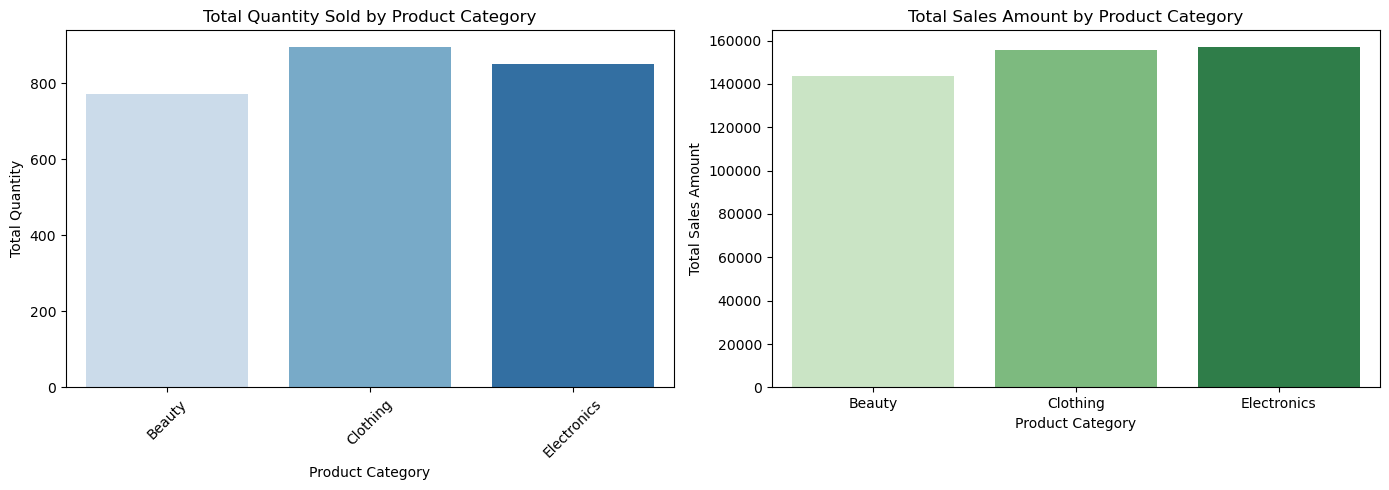

In [29]:
# grouping the data
category_summary = df.groupby('Product Category')[['Quantity', 'Total Amount']].sum()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# bar plot for quantity
sns.barplot(x=category_summary.index, y=category_summary['Quantity'], ax=ax[0], palette='Blues')
ax[0].set_title('Total Quantity Sold by Product Category')
ax[0].set_xlabel('Product Category')
ax[0].set_ylabel('Total Quantity')
ax[0].tick_params(axis='x', rotation=45)

# bar plot for total amount
sns.barplot(x=category_summary.index, y=category_summary['Total Amount'], ax=ax[1], palette='Greens')
ax[1].set_title('Total Sales Amount by Product Category')
ax[1].set_xlabel('Product Category')
ax[1].set_ylabel('Total Sales Amount')
ax[1].tick_params(axis='x')

plt.tight_layout()
plt.show()


### Create a pie chart for showing the percentage for each product category

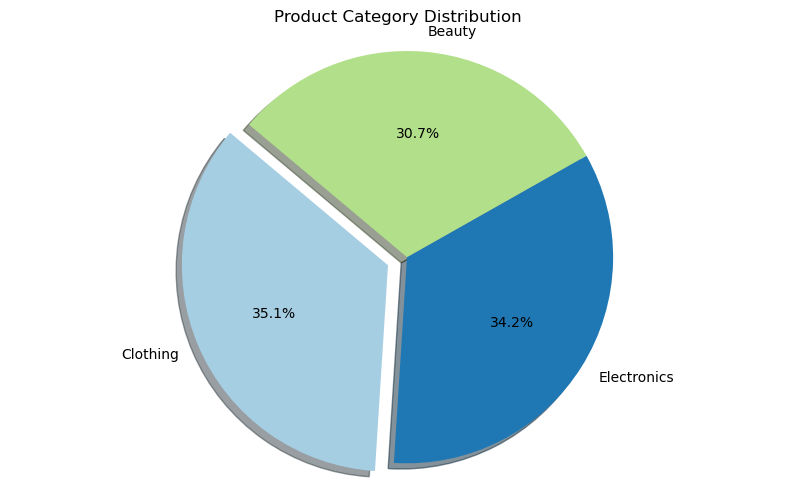

In [32]:
# Count occurrences of each product category
category_counts = df['Product Category'].value_counts()

# Define explode to highlight the largest category
explode_list = [0.1 if i == category_counts.idxmax() else 0 for i in category_counts.index]

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',  # Display percentage values with one decimal place
    colors=plt.cm.Paired.colors,  # Using a named colormap(plt.cm is the correct way to access colormaps , Paired is a suitable qualitative colormap)
    explode=explode_list,  # Apply the explode list(To highlight the largest category, you need to use the explode parameter)
    startangle=140,
    shadow=True
)

plt.title('Product Category Distribution')
plt.axis("equal")  # Ensures the pie chart is circular
plt.show()

### Split the dates into Day,Month and Year

In [34]:
# seeing the date column
df['Date'] = pd.to_datetime(df['Date'])
# Add Month column and extract month from the date
df['Month'] = df['Date'].dt.month_name()
df['Month']

0      November
1      February
2       January
3           May
4           May
         ...   
995         May
996    November
997     October
998    December
999       April
Name: Month, Length: 1000, dtype: object

In [41]:
# Convert 'Date' column to datetime objects if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract month names and create a new DataFrame
month = pd.DataFrame({'Month': df['Date'].dt.month_name()})

# Print the new DataFrame
print(month.head()) # Use .head() to see the first few rows

      Month
0  November
1  February
2   January
3       May
4       May


### Total sales amount over each month

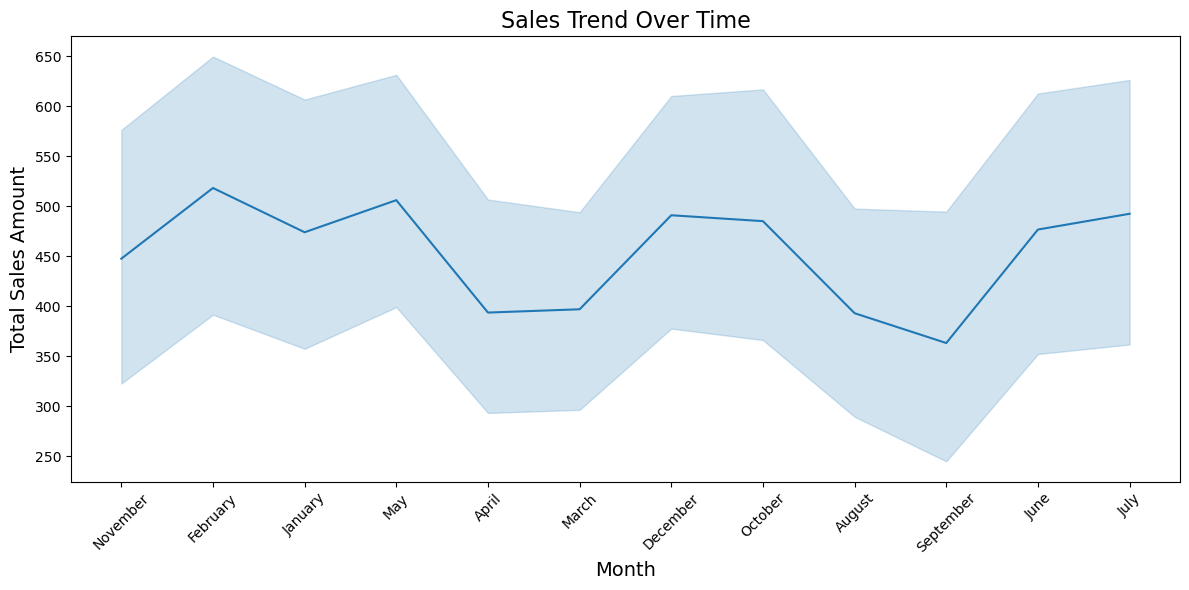

In [45]:
# sales trends overtime
plt.figure(figsize=(12, 6))
sns.lineplot(x="Month", y="Total Amount", data=df)
plt.title('Sales Trend Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

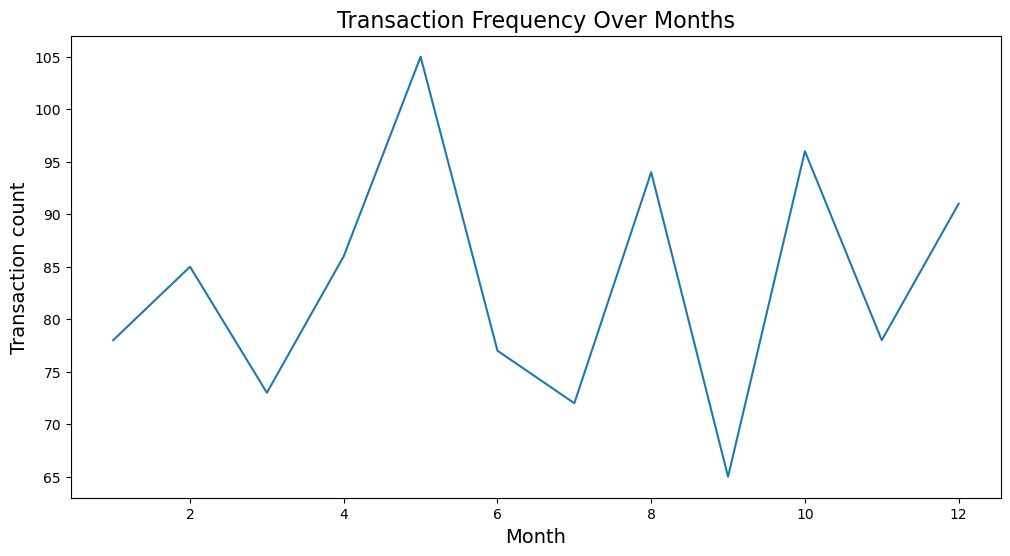

In [56]:
df['Month'] = df['Date'].dt.month
transaction_count = df.groupby('Month')['Transaction ID'].count()

plt.figure(figsize=(12, 6))
sns.lineplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Transaction count', fontsize=14)
plt.show()

### Transaction Frequency Over each Month

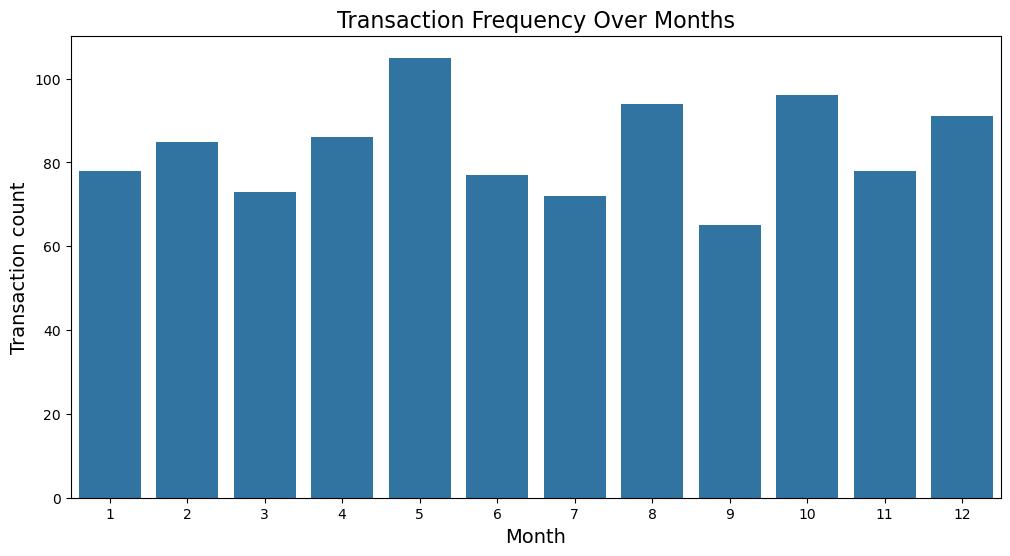

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Transaction count', fontsize=14)
plt.show()

### Sales Heatmap

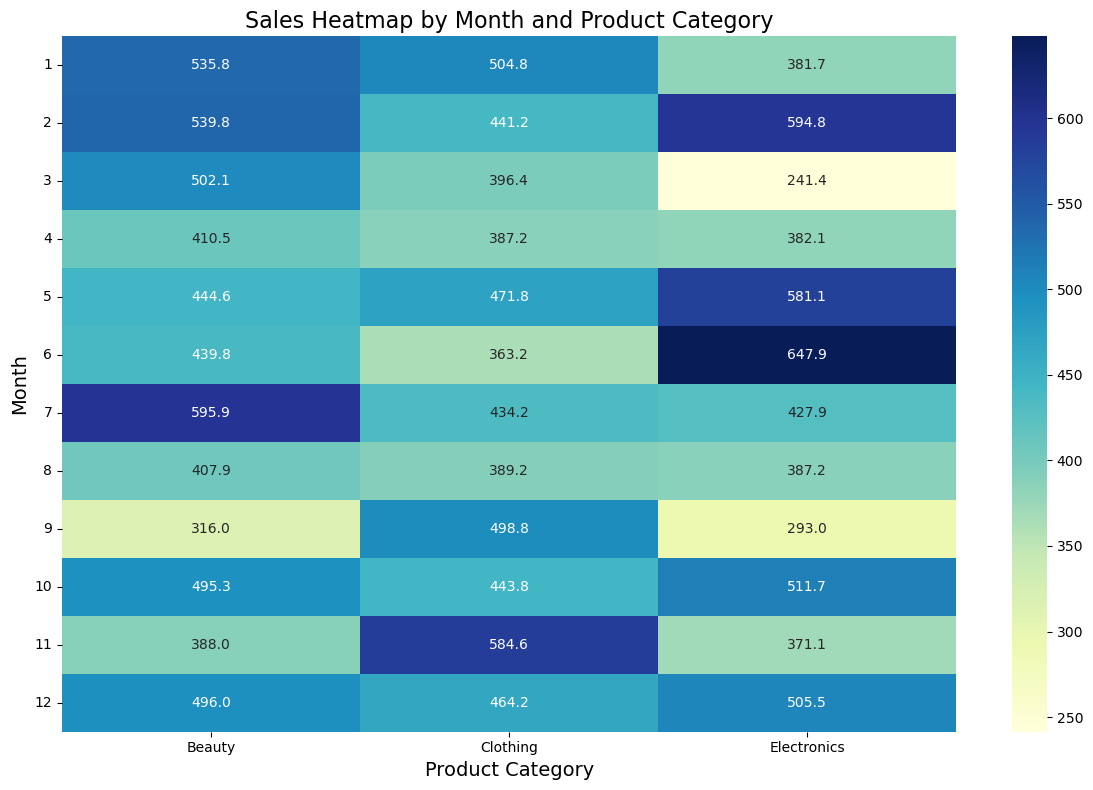

In [65]:

# Assuming you have a DataFrame 'df' with 'Month', 'Product Category', and 'Total Amount' columns

heatmap = df.pivot_table(index='Month', columns='Product Category', values='Total Amount')
plt.figure(figsize=(12, 8))  # Increased height for better readability if many product categories
sns.heatmap(heatmap, annot=True, fmt='.1f', cmap='YlGnBu') # Added cmap for better visualization
plt.title('Sales Heatmap by Month and Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.yticks(rotation=0) # Ensure month names are horizontal
plt.tight_layout()
plt.show()

### Gender for Male and Female

In [66]:
df['Age'].count()

1000

In [67]:
df[df['Gender'].isin(['Male','Female'])]['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

### Pie Chart

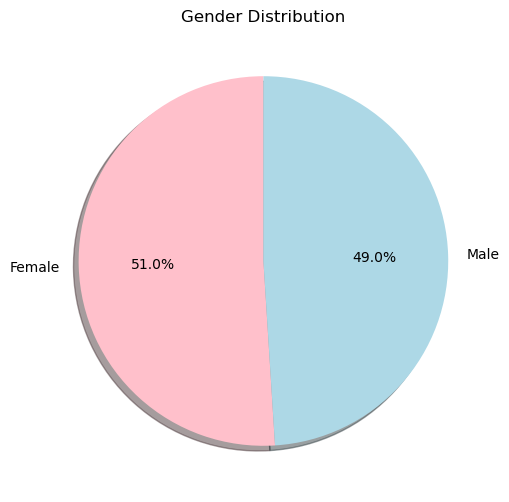

In [77]:
gender_counts = {'Female':510, 'Male':490}

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts.values(),
    labels=gender_counts.keys(),
    autopct='%1.1f%%',  # Display percentage values with one decimal place
    colors=['pink','lightblue'],  
    startangle=90,
    shadow=True
)

plt.title('Gender Distribution')
plt.show()

### Bining the Age

In [78]:
age_bins = [0, 18, 25, 35, 50, 100]
age_group =['0-18', '19-25', '26-35', '36-50', '50+']
df['Age group'] = pd.cut(df['Age'],bins = age_bins, labels= age_group)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,month,Age group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,November,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,February,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,January,36-50
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,May,36-50
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,May,26-35


### Distribution of the age and gender column in product category

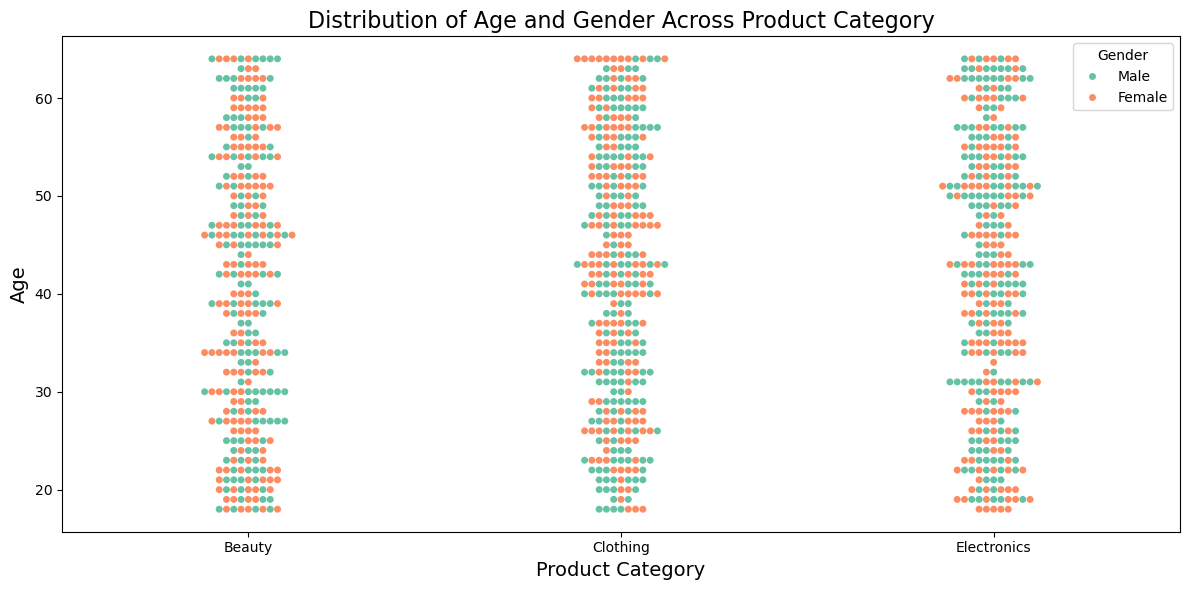

In [81]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Product Category', y='Age', hue='Gender', data=df, palette='Set2')
plt.title('Distribution of Age and Gender Across Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.legend(title='Gender', loc='upper right', fontsize=10)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Histrogram for count of age persons

<Axes: title={'center': 'Age of Personds'}, xlabel='Age', ylabel='count'>

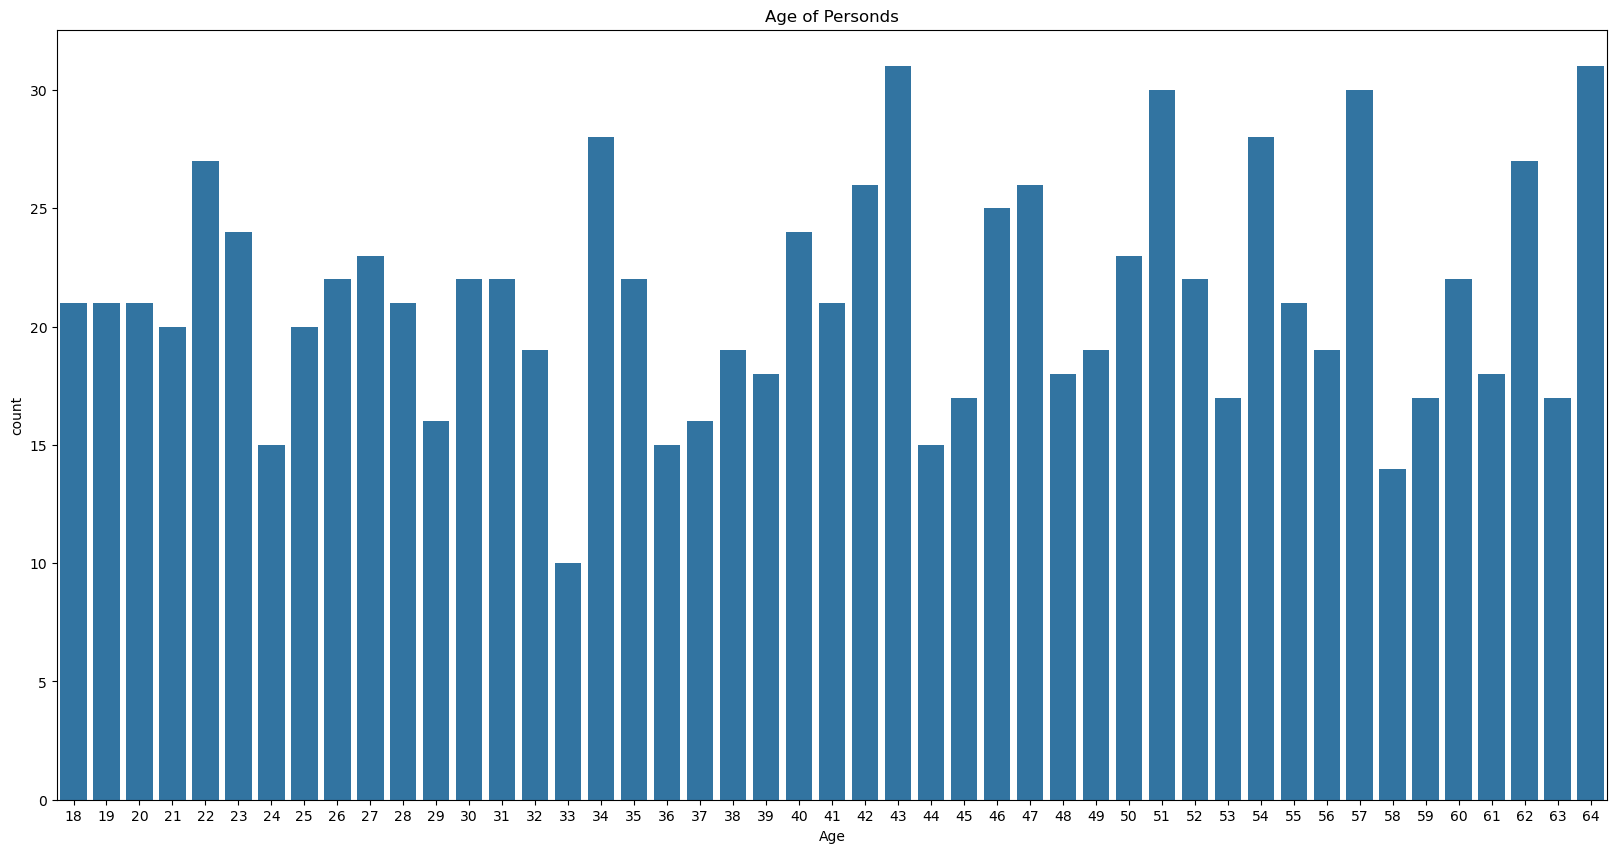

In [83]:
plt.figure(figsize=(20, 10))
plt.title('Age of Personds')
plt.xlabel('Age')
sns.countplot(x="Age",data = df)


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Month             1000 non-null   int32         
 10  month             1000 non-null   object        
 11  Age group         1000 non-null   category      
dtypes: category(1), datetime64[ns](1), int32(1), int64(5), object(4)
memory usage: 83.3+ KB


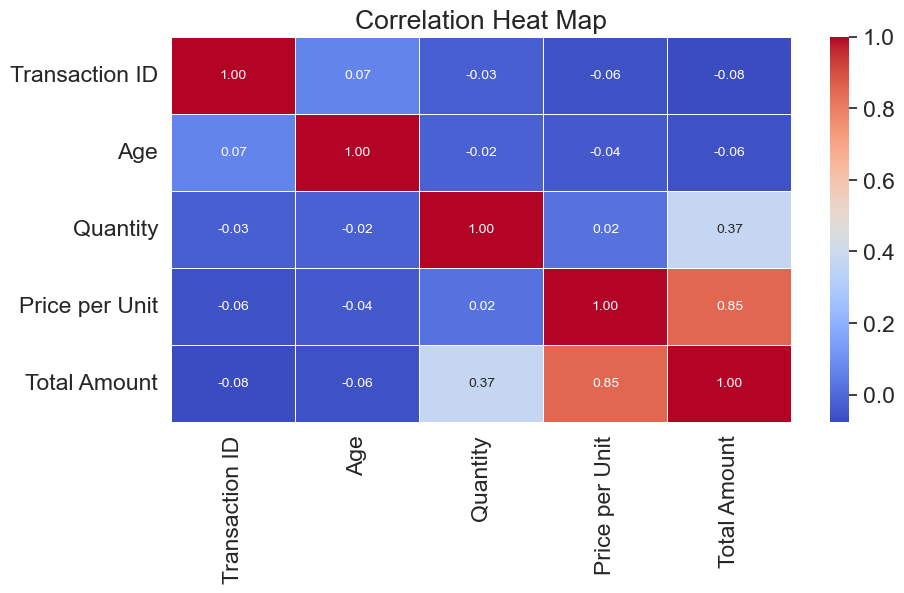

In [93]:
# Calculate the correlation matrix for integer columns
correlation = df[df.select_dtypes(include=['int64']).columns].corr()

# Set font scale for better readability
sns.set(font_scale=1.5)

# Create the heatmap
plt.figure(figsize=(10, 5))
plt.title('Correlation Heat Map', fontsize=19)  # Corrected title
ax = sns.heatmap(correlation, annot=True, annot_kws={'size': 10}, fmt='.2f', linewidths=.5, cmap='coolwarm')
plt.show()

### Thank You!